#  🚜Predicting the Sale Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of
bulldozers.

## 1. Problem defition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
> its given in the dataset we downloaded from kaggle.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

for more on the evaluation of this project check:
https: //www.kaggle.com/c/bluebook-for-bul1dozers/overview/evaluation


## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data
dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKmsi3RyieQ2Fpgix-beSYV/edit?usp=sharing

 


In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [52]:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory = False)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [54]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [56]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

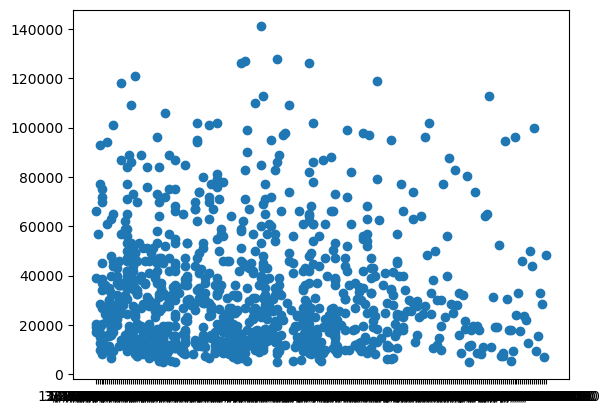

In [57]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<AxesSubplot: ylabel='Frequency'>

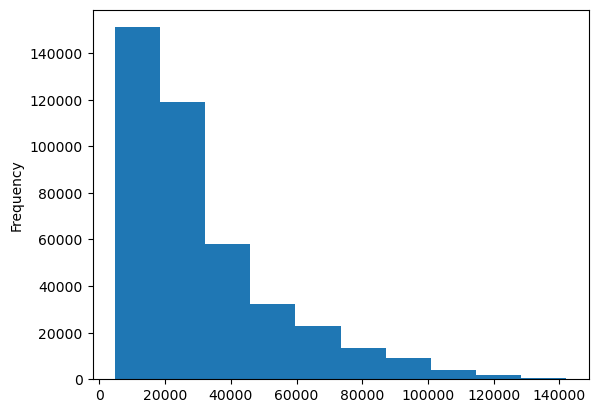

In [58]:
df.SalePrice.plot.hist()

# Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the “parse dates parameter. T


In [59]:
# Import dataset again but this time with parse date
df=pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])

In [60]:
df.saledate.dtype

dtype('<M8[ns]')

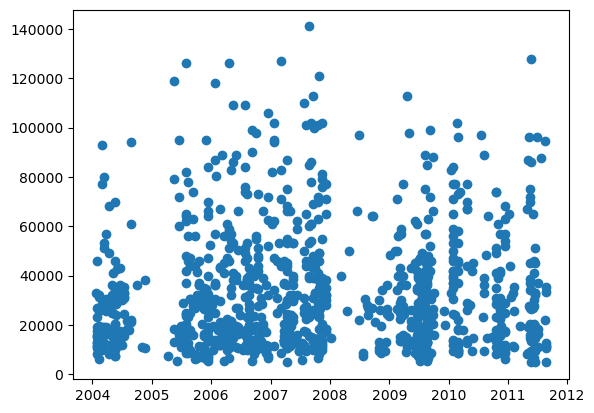

In [61]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [62]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [63]:
# Sorting the date
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [64]:
df_tmp=df.copy()

We made a copy of our data so that we can make some changes on it without loosing our original data.

# Adding some new Feature and deleting the useless features
like saledate

In [65]:
df_tmp['SaleYear']=df_tmp.saledate.dt.year
df_tmp['SaleMonth']=df_tmp.saledate.dt.month
df_tmp['SaleDay']=df_tmp.saledate.dt.day
df_tmp['SaleDayOfWeek']=df_tmp.saledate.dt.dayofweek
df_tmp['SaleDayOfYear']=df_tmp.saledate.dt.dayofyear

In [66]:
df_tmp.drop('saledate',inplace=True,axis=1)

In [67]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


# Convert string to categories
One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here:
https://pandaspydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-


In [68]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [69]:
# Find the column which contain the string
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [70]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype('category').cat.as_ordered()

In [71]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [72]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [73]:
# check missing data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [74]:
# save this temp csv file
df_tmp.to_csv('temproary.csv',
             index= False)

In [75]:
# importing the temporary data
df_tmp=pd.read_csv('temproary.csv',
             low_memory=False)

# Now fill the missing value in the numeric data

In [76]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [77]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [78]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [79]:
# Fill the missing data columns
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #fILLING THE MISSING DATA
            df_tmp[label]=content.fillna(content.median())

In [80]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

HENCE NO MISSING DATA IN NUMERIC TYPE

In [81]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [82]:
# Fill the missing categorical data 
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [83]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label]=pd.Categorical(content).codes+1
        

In [84]:
df_tmp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

# Modellling

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
%%time

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
# Fitting the model
model.fit(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])

CPU times: total: 44min 6s
Wall time: 6min 42s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
df_tmp.head()

In [ ]:
# Scoring the model
model.score(df_tmp.drop('SalePrice',axis=1),df_tmp['SalePrice'])

# Splitting the data

In [86]:
df_val=df_tmp[df_tmp.SaleYear==2012]
df_train=df_tmp[df_tmp.SaleYear!=2012]



In [87]:
# Split data into X & Y

X_train,Y_train=df_train.drop('SalePrice',axis=1),df_train['SalePrice']
X_val,Y_val=df_val.drop('SalePrice',axis=1),df_val['SalePrice']

# Building Evaluation Metrics

In [23]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(Y_test,Y_preds):
    
    return np.sqrt(mean_squared_log_error(Y_test,Y_preds))

def evaluation_metrics(model):
    train_preds=model.predict(X_train)
    valid_preds=model.predict(X_val)
    scores={'Training MAE':mean_absolute_error(Y_train,train_preds),
            'Valid MAE':mean_absolute_error(Y_val,valid_preds),
            'Traning RMSLE':rmsle(Y_train,train_preds),
            'Valid RMSLE':rmsle(Y_val,valid_preds),
            'Training R^2':r2_score(Y_train,train_preds),
            'Valid R^2':r2_score(Y_val,valid_preds)
                                  }
    
    return scores
    

In [24]:
len(df_tmp)

412698

In [25]:
%%time 
model= RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000)
model.fit(X_train,Y_train)

NameError: name 'RandomForestRegressor' is not defined

In [48]:
evaluation_metrics(model)

{'Training MAE': 5563.72867258336,
 'Valid MAE': 7168.9377352458305,
 'Traning RMSLE': 0.2578202020674087,
 'Valid RMSLE': 0.2929702627803096,
 'Training R^2': 0.8605936890077203,
 'Valid R^2': 0.8322757239076886}

Hyperparamter tuning using RandomisedSaerchCV

In [57]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = { 'n_estimators' : np.arange(10, 100, 10),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
             "min_samples_leaf": np.arange(1, 20, 2),
             "max_features": [0.5, 1, "sqrt", "auto"],
             "max_samples": [10000]}

 

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42,
                                                  ),
                                                  param_distributions=rf_grid,
                                                  cv=5,
                                                  verbose=True,
                                                    n_iter=2)

# Fiting the rs_model
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 6.28 s
Wall time: 43 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
evaluation_metrics(rs_model)

{'Training MAE': 11527.697849523825,
 'Valid MAE': 13505.955411858089,
 'Traning RMSLE': 0.49551679869373894,
 'Valid RMSLE': 0.5127099327599148,
 'Training R^2': 0.5026530473821734,
 'Valid R^2': 0.4912719042103252}

# Training a model with the ideal hyperparaameters

In [88]:
%%time 

ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)


ideal_model.fit(X_train,Y_train)

CPU times: total: 7min 36s
Wall time: 1min 2s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [61]:
evaluation_metrics(ideal_model)

{'Training MAE': 2942.3406510781565,
 'Valid MAE': 5963.47989565748,
 'Traning RMSLE': 0.14415360816981193,
 'Valid RMSLE': 0.24694437453456,
 'Training R^2': 0.9591796499547254,
 'Valid R^2': 0.8813934466550004}

In [62]:
evaluation_metrics(rs_model)

{'Training MAE': 11527.697849523825,
 'Valid MAE': 13505.955411858089,
 'Traning RMSLE': 0.49551679869373894,
 'Valid RMSLE': 0.5127099327599148,
 'Training R^2': 0.5026530473821734,
 'Valid R^2': 0.4912719042103252}

# Testing on the test data

In [89]:
df_test=pd.read_csv('bluebook-for-bulldozers/Test.csv',
                   low_memory=False,
                   parse_dates=['saledate'])

In [90]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


# Doing the same manipulation which we did on training data

In [91]:
def data(df):
    df['SaleYear']=df.saledate.dt.year
    df['SaleMonth']=df.saledate.dt.month
    df['SaleDay']=df.saledate.dt.day
    df['SaleDayOfWeek']=df.saledate.dt.dayofweek
    df['SaleDayOfYear']=df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
# filling th enumeric
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            #fILLING THE MISSING DATA
             df[label]=content.fillna(content.median())

        
# Converting strings to categorical data and filling the missing one's 
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype('category').cat.as_ordered()
            df[label]=pd.Categorical(content).codes+1
    return df

In [124]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   fiModelDesc               12457 non-null  int16  
 9   fiBaseModel               12457 non-null  int16  
 10  fiSecondaryDesc           12457 non-null  int8   
 11  fiModelSeries             12457 non-null  int8   
 12  fiModelDescriptor         12457 non-null  int8   
 13  ProductSize               12457 non-null  int8   
 14  fiProd

In [92]:
df_test=data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,1,4,5,0,0,2012,5,10,3,131


In [93]:
test_preds=ideal_model.predict(df_test)

In [94]:
test_preds

array([17152.21872607, 19373.40178018, 48291.39730439, ...,
       14135.97083881, 16879.80666014, 27564.87570226])

In [95]:
df_predict=pd.DataFrame({})
df_predict['SalesID']=df_test['SalesID']
df_predict['SalePrice']=test_preds
df_predict

,SalesID,SalePrice
0,1227829,17152.218726
1,1227844,19373.401780
2,1227847,48291.397304
3,1227848,67254.362942
4,1227863,55602.210485
...,...,...
12452,6643171,39339.691286
12453,6643173,12108.524162
12454,6643184,14135.970839
12455,6643186,16879.806660


In [132]:
df_predict.to_csv('the resultant data.csv')

# Features Importance


In [102]:
ideal_model.feature_importances_

array([0.03504446, 0.01737377, 0.04452544, 0.00201861, 0.00329883,
       0.20660726, 0.00344748, 0.00114963, 0.04058348, 0.05493139,
       0.06503969, 0.00575552, 0.0321875 , 0.17402344, 0.05321646,
       0.00603849, 0.00377422, 0.0039449 , 0.00285774, 0.0452063 ,
       0.00058484, 0.00022675, 0.00068161, 0.00023714, 0.00109263,
       0.00205171, 0.00253838, 0.00713099, 0.00098058, 0.00118632,
       0.00687476, 0.00636725, 0.00445288, 0.00199   , 0.00230712,
       0.01849539, 0.00164826, 0.02175104, 0.0011747 , 0.00794414,
       0.00134719, 0.00095435, 0.00156937, 0.00057406, 0.00038231,
       0.00049513, 0.00073075, 0.00460091, 0.00080785, 0.00035168,
       0.00083585, 0.07404403, 0.00384739, 0.00568805, 0.0029616 ,
       0.0100684 ])

In [118]:
def plot(columns,importance,n=20):
    df=(pd.DataFrame({'features':columns,
                    'feature importance':importance})
                    .sort_values('feature importance',ascending=False)
                    .reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature importance'][:20])
    ax.invert_yaxis()

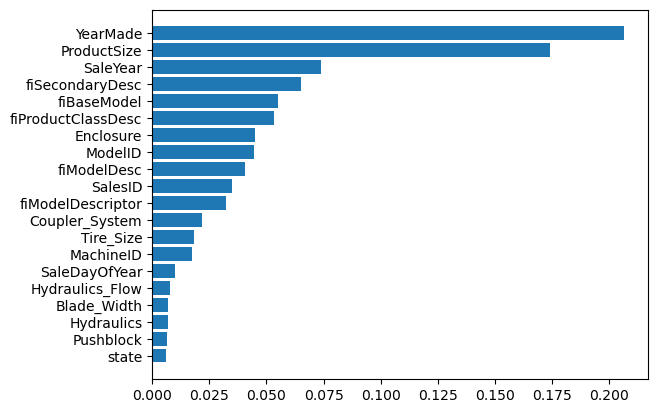

In [119]:
plot(X_train.columns,ideal_model.feature_importances_)